This is a simple starter notebook to get started with the NLP: Text Classification.

This notebook covers:

- Loading the data
- Simple Exploratory Data Analysis
- Data preprocessing (CLearning, LabelEncoding and Tokenization )
- Creating a simple model
- Tuning 
- Making a submission
- Some tips for improving your score

Importing Libraries

In [159]:
import pandas as pd, numpy as np

import matplotlib.pylab as plt
# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup


Uncomment To run 

In [160]:
# Text = pd.read_csv("https://zenodo.org/record/3355823/files/ecommerceDataset.csv?download=1", names =["Lable","Text"])
# Text = Text.to_csv('Text.csv')

In [161]:
Text = pd.read_csv('Text.csv')
Text.head()

,Unnamed: 0,Lable,Text
0,0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [162]:
# Let’s observe the shape of our datasets.
Text = Text[["Lable", "Text"]]
print('Text data shape :', Text.shape)

Text data shape : (50425, 2)


The above output shows the number of rows and columns for the dataset. We have 2 variables in the dataset, 50425 independent variables and 1 dependent variable.

We can observe the first five rows from our data set by using the head() method from the pandas library.

<AxesSubplot:>

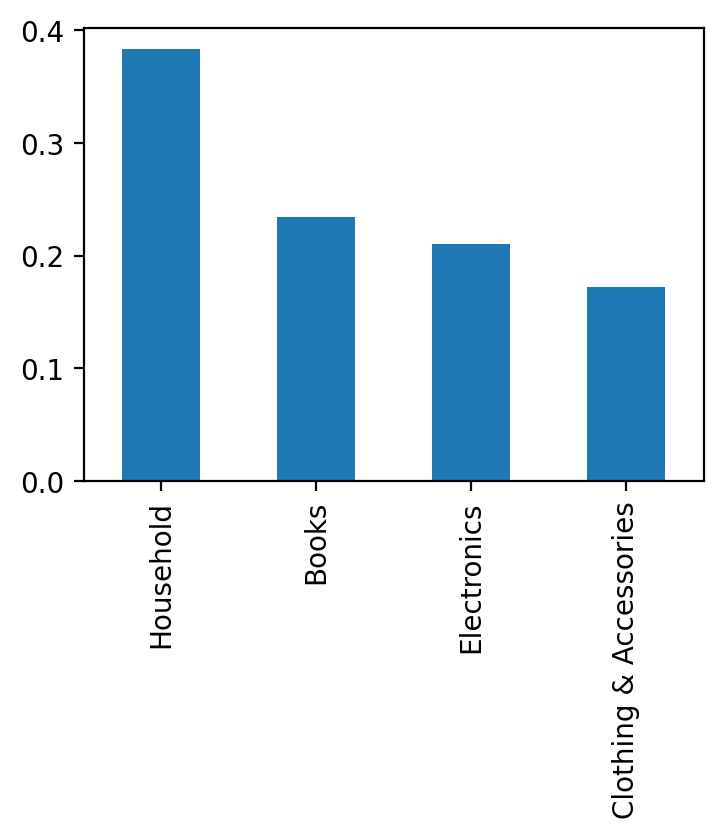

In [163]:
# Show Categoy support
fig,ax=plt.subplots(dpi=200, figsize=(4,3))
#ax.set_xticks(rotation=90)
Text.Lable.value_counts(normalize=True).plot.bar(ax=ax)

Looks like we have a class imbalance and low support for most of the Labels

If you want to learn how to handle missing data in your dataset, i recommend you read How to Handle Missing Data with Python by Jason Brownlee.

# Clearning 
## Data preparation for machine learning
Before you train the model for prediction, you need to perform data cleaning and preprocessing. This is a very important step; your model will not perform well without these steps.

The first step is to separate the independent variables and target() from the training data. Then transform the target values from the object data type into numerical.
We can filter out all tokens that we are not interested in, such as all standalone punctuation.This can be done by iterating over all tokens and only keeping those tokens that are all alphabetic.

In [164]:
# We can also use the .isnull() method to check for empty values
print('Missing values for Text Dataset:', Text.isnull().sum())

Missing values for Text Dataset: Lable    0
Text     1
dtype: int64


In [165]:
from tkinter import Label
from sklearn.preprocessing import LabelEncoder
Text= Text.dropna()
Label = Text['Lable'].values.tolist()
le = LabelEncoder()
Label = le.fit_transform(Label)


Exception ignored in: <function _WeakArrayKeyMap.set.<locals>.on_destroy at 0x00000179897161F0>
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\joblib\_memmapping_reducer.py", line 139, in on_destroy
    del self._data[key]
KeyboardInterrupt: 


<AxesSubplot:ylabel='Frequency'>

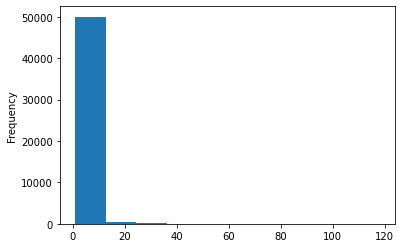

In [166]:
# put spaces between the / since those look like spaces
Text[Text['Text'].notnull()]['Text'].str.split('/').apply(len).plot.hist()

Seems like there are not spaces between the words. This is often done to save space description

In [167]:
# put spaces between the / since those look like spaces
Text[Text['Text'].notnull()]['Text'].str.split('\ ')

0        [Paper, Plane, Design, Framed, Wall, Hanging, ...
1        [SAF, 'Floral', Framed, Painting, (Wood,, 30, ...
2        [SAF, 'UV, Textured, Modern, Art, Print, Frame...
3        [SAF, Flower, Print, Framed, Painting, (Synthe...
4        [Incredible, Gifts, India, Wooden, Happy, Birt...
                               ...                        
50420    [Strontium, MicroSD, Class, 10, 8GB, Memory, C...
50421    [CrossBeats, Wave, Waterproof, Bluetooth, Wire...
50422    [Karbonn, Titanium, Wind, W4, (White), Karbonn...
50423    [Samsung, Guru, FM, Plus, (SM-B110E/D,, Black)...
50424               [Micromax, Canvas, Win, W121, (White)]
Name: Text, Length: 50424, dtype: object

In [168]:

Text['Text'] = Text['Text'].str.lower()
Text.head()

,Lable,Text
0,Household,paper plane design framed wall hanging motivat...
1,Household,"saf 'floral' framed painting (wood, 30 inch x ..."
2,Household,saf 'uv textured modern art print framed' pain...
3,Household,"saf flower print framed painting (synthetic, 1..."
4,Household,incredible gifts india wooden happy birthday u...


In [169]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Text.Text)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

## Splitting The Data The First Time

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, Text['Lable'], test_size=0.4, random_state=101)

# X_val, X_test, y_val,y_test = train_test_split(X_val,y_val, test_size=0.5, random_state=101)

# Model & Prediction 

In [171]:
from sklearn.naive_bayes import MultinomialNB

# Training the model on the training dataset
clf = MultinomialNB().fit(X_train, y_train)

# Testing 

In [172]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))


['Household']


In [173]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss, roc_auc_score

# Predict
y_pred = clf.predict(X_val)


In [174]:
print(y_pred)

['Books' 'Household' 'Clothing & Accessories' ... 'Clothing & Accessories'
 'Household' 'Household']


In [175]:
# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred))

ACCURACY OF THE MODEL:  0.9352503718393654


In [176]:
# Classification report
print(classification_report(y_val, y_pred))

                        precision    recall  f1-score   support

                 Books       0.97      0.91      0.94      4773
Clothing & Accessories       0.98      0.92      0.95      3463
           Electronics       0.97      0.88      0.92      4173
             Household       0.88      0.98      0.93      7761

              accuracy                           0.94     20170
             macro avg       0.95      0.93      0.94     20170
          weighted avg       0.94      0.94      0.94     20170



## More Clearning

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Tring TfidfVectorizer to see the defference
vectorizer = TfidfVectorizer(
    sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
)
# the following will be the training data
Vectors = vectorizer.fit_transform(Text.Text)
Vectors.shape

(50424, 78878)

# Vectorizer has attribute .vocabulary_ which stores the cout of words from the entire message feature of data df
vocab_dict = vectorizer.vocabulary_

# Data Split The Second Time

In [180]:
X_train, X_val, y_train, y_val = train_test_split(Vectors, Text['Lable'], test_size=0.4, random_state=101)

## If Only I can do some about = class_prior: array-like of shape (n_classes,), default=None
Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.

In [182]:
model1 = MultinomialNB(alpha = 1.0).fit(X_train, y_train)   
y_pred = model1.predict(X_val)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred))


ACCURACY OF THE MODEL:  0.9319781854238969


In [ ]:
# Classification report
print(classification_report(y_val, y_pred))

                        precision    recall  f1-score   support

                 Books       0.97      0.91      0.94      4773
Clothing & Accessories       0.98      0.91      0.94      3463
           Electronics       0.96      0.88      0.92      4173
             Household       0.88      0.98      0.93      7761

              accuracy                           0.93     20170
             macro avg       0.95      0.92      0.93     20170
          weighted avg       0.94      0.93      0.93     20170



Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

In [ ]:
model1.get_params(deep=True)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

# Clearlly The first Model is Better than the Second one so i go with the First the Model and its Properties to perform tuning on it and see what happens next.

## Tuning the hyper-parameters
Two generic approaches to parameter search are provided in scikit-learn: for given values, GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution.

In [183]:
def my_tokenizer(X):
    newlist = []
    for alist in X:
        newlist.append(alist[0].split(' '))
    return newlist

In [184]:
#Pipeline with hyperparameter tuning¶
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline(
    [
        ("vect", CountVectorizer(tokenizer=my_tokenizer)),
        ("tfidf", TfidfTransformer()),
        ("clf", MultinomialNB( )
        ),
    ]
)

# Parameters to use for grid search. Uncommenting more parameters will give
# better exploring power but will increase processing time in a combinatorial
# way


In [185]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])

In [186]:
parameters = {
    'clf__alpha': (1.0000000000000001e-05, 9.9999999999999995e-07),
    "vect__max_df": (0.5, 0.75, 1.0),
    'vect__lowercase': (True, False),
    'vect__max_features': (None, 5000, 10000, 50000),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__class_prior':(0.25,0.5,0.75),
    'clf__fit_prior':  (True, False),
}


# Find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


AttributeError: lower not found

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits. Gave me a BIG Error but the parameters were generated, So i will go with that and figure thing out later.

In [187]:

print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best parameters set:
	clf__alpha: 1e-05
	clf__class_prior: 0.25
	clf__fit_prior: True
	tfidf__norm: 'l1'
	tfidf__use_idf: True
	vect__lowercase: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 1)


In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer
# the following will be the training data
count_vect = CountVectorizer(ngram_range = (1, 1),max_df = 0.5,lowercase= True)
X_train_counts = count_vect.fit_transform(Text.Text)
tfidf_transformer = TfidfTransformer(sublinear_tf=True,norm='l1',use_idf=True)
Vectors = tfidf_transformer.fit_transform(X_train_counts)


In [189]:

X_train, X_val, y_train, y_val = train_test_split(Vectors, Text['Lable'], test_size=0.4, random_state=101)
model1 = MultinomialNB(alpha = 1e-05,fit_prior= True).fit(X_train, y_train)   


In [190]:

y_pred = model1.predict(X_val)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred))
# Classification report
print(classification_report(y_val, y_pred))

ACCURACY OF THE MODEL:  0.9514625681705503
                        precision    recall  f1-score   support

                 Books       0.98      0.94      0.96      4773
Clothing & Accessories       0.99      0.93      0.96      3463
           Electronics       0.98      0.92      0.95      4173
             Household       0.91      0.99      0.95      7761

              accuracy                           0.95     20170
             macro avg       0.96      0.94      0.95     20170
          weighted avg       0.95      0.95      0.95     20170



# Let try it on an Unseen Data
## Making the first submission
Let’s see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First we make predictions on the competition test data set.

In [191]:
X_val, X_test, y_val,y_test = train_test_split(X_val,y_val, test_size=0.5, random_state=101)

In [193]:
predictions = pd.DataFrame(model1.predict_proba(X_test),columns=model1.classes_)

In [194]:
predictions.head()

,Books,Clothing & Accessories,Electronics,Household
0,0.041624,0.664224,0.056883,0.237268
1,0.026637,0.009004,0.042856,0.921503
2,0.033253,0.011242,0.716736,0.238768
3,0.042750,0.041905,0.766896,0.148450
4,0.050572,0.012400,0.007785,0.929244


In [195]:
# Create the submission csv file
predictions.to_csv('first_submission.csv', index = True)